In [ ]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2022,1,1)

In [ ]:
df_nifty=web.DataReader("^NSEI","yahoo",start,end)
df_nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [ ]:
df_b=web.DataReader("M&M.NS","yahoo",start,end)
df_b.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,744.750000,723.000000,725.0,732.450012,9543128.0,716.961609
2021-01-04,751.000000,727.250000,735.0,749.099976,4547027.0,733.259521
2021-01-05,748.000000,730.000000,748.0,740.099976,3551554.0,724.449829
2021-01-06,746.450012,730.450012,741.0,736.099976,3601608.0,720.534424
2021-01-07,755.000000,740.099976,743.0,744.400024,4063641.0,728.658936


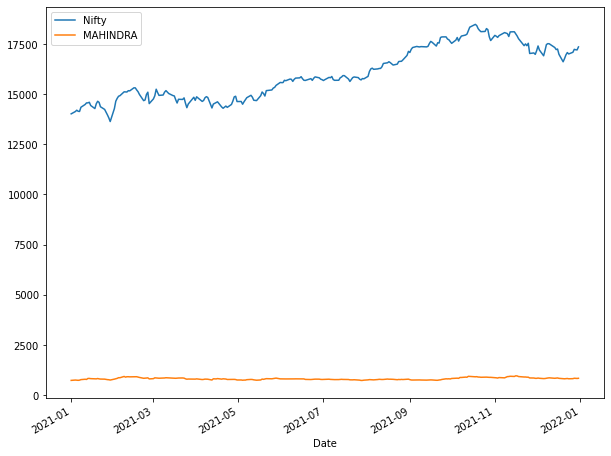

In [ ]:
df_nifty['Close'].plot(label = 'Nifty', figsize=(10,8) )
df_b['Close'].plot(label = 'MAHINDRA')
plt.legend()

In [ ]:
df_nifty['cum']=df_nifty["Close"]/df_nifty["Close"].iloc[0]
df_b['cum']=df_b["Close"]/df_b["Close"].iloc[0]


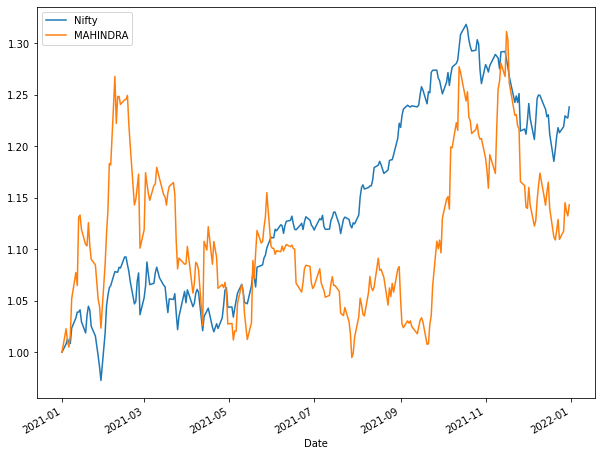

In [ ]:
df_nifty['cum'].plot(label = 'Nifty', figsize=(10,8))
df_b['cum'].plot(label = 'MAHINDRA')
plt.legend()

In [ ]:
df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_b['daily_ret'] = df_b['Close'].pct_change(1)

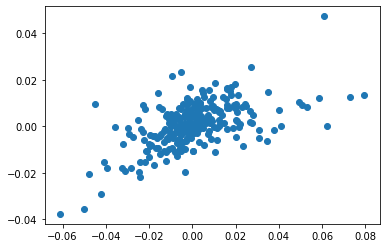

In [ ]:
plt.scatter(df_b['daily_ret'],df_nifty['daily_ret'])

In [ ]:
LR = stats.linregress(df_b['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.28689878757048115, intercept=0.0007025289508417101, rvalue=0.5740918909816692, pvalue=4.696884219027904e-23, stderr=0.026141906286282445, intercept_stderr=0.0005161479613729538)

In [ ]:
beta,alpha,r_val,p_val,std_err = LR

In [ ]:
beta

0.28689878757048115

In [ ]:
alpha

0.0007025289508417101

In [ ]:
date=datetime.datetime(2022,7,19)

In [ ]:
rm = (df_nifty['Close'].iloc[-1]-df_nifty['Close'].iloc[0])/df_nifty['Close'].iloc[0]
rm

0.2379392075650034

In [ ]:
rf=0.055 #fd return of sbi taken as risk free return
rf

0.055

In [ ]:
r_val

0.5740918909816692

In [ ]:
p_val

4.696884219027904e-23

In [ ]:
smb=0.15

In [ ]:
hml=0.17

In [ ]:

expected_return_capm= 1+beta*(rm-rf)
expected_return_capm

1.052485036849504

In [ ]:
df_mah=web.DataReader("M&M.NS","yahoo",date,date)
df_mah

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-19,1189.5,1161,1161.900024,1186.25,4056414,1186.25


In [ ]:
actual_return=df_mah['Close'].iloc[0]/df_b['Close'].iloc[0]
actual_return

1.6195644483991074

In [ ]:
err_capm=(actual_return-expected_return_capm)/actual_return
err_capm

0.35014315861906264

In [ ]:
expected_return_fama=1+beta*(rm-rf)+r_val*smb+p_val*hml+alpha
expected_return_fama

1.139301349447596

In [ ]:
err_fama=(expected_return_fama-actual_return)/actual_return
err_fama

-0.2965384300860873

In [ ]:
# It can be seen that return in fama-french Three_Factor model is less than CAPM model.